# Machine Learning - Modelling

We will implement the following ML models for predicting the hotel room price:

- Linear Model: Elastic Net
- Tree modelling: XGBoost

For that we will use the fetaure engineered dataset, which has been treated to avoid multicollinearity as well as skewness. We will split the dataset in a 70-30 for cross validation.

Remeber that some of the features (the binary ones) are really imbalanced so need to consider that when doing our analysis.

In [3]:
#%reset

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from scipy.special import inv_boxcox
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#General purpose tools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

#Different models

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgboost

### Getting the data ready

We will split the data in training and test set following a 70-30 proportion.

In [ ]:
hotels.to_csv()

In [3]:
#We split the data in train and test datasets
hotels = pd.read_csv('./Data/hotels_for_modelling.csv') #this df has the original index we will need
hotels_modelling = hotels.drop(labels=['Unnamed: 0', 'Index','Price_Night_USD','logPrice', 'Latitude', 'Longitude'], axis=1)
hotels_modelling.head()

,Average_Household_Size,Purchasing_Power_Capita,Total_Population,Total_Reviews,Ranking_Users,Hotel_stars,Housing_Transactions,Median_House_Price,Total_Airbnb_Beds,Median_Airbnb_Price,Total_Restaurants,Median_Restaurant_Ranking,Heathrow,Stansted,Gatwick,City Airport,Tourist_POIs,Business_POIs,Gym,Internet,AC,Parking,Pool,Room_Service,BoxCoxPrice
0,1.029619,0.518931,0.065763,7.597396,-1.584253,5.0,0.823362,13.790194,0.217042,0.417710,5.231109,-0.189167,50,73,60,44,3.277145,3.091042,1.0,1.0,1.0,0.0,0.0,1.0,2.867086
1,1.064711,1.502037,-0.546826,6.846943,-0.977880,5.0,0.236269,14.226958,-0.224972,1.678382,5.017280,0.103751,45,72,45,42,3.332205,3.218876,1.0,1.0,1.0,0.0,0.0,1.0,2.873022
2,1.252763,-1.358257,0.215960,8.496990,-1.011197,4.0,-1.294364,13.476537,0.238430,-0.816699,5.030438,-0.673626,63,59,55,34,3.113515,3.020425,0.0,1.0,1.0,0.0,0.0,0.0,2.754949
3,1.064711,-1.135153,-1.050201,8.364042,-1.307720,5.0,-1.483072,14.042647,-1.027015,-1.105603,4.276666,-0.165794,67,78,50,36,3.191847,2.833213,1.0,1.0,1.0,0.0,0.0,1.0,2.890451
4,1.252763,0.401883,-1.866201,8.554296,-1.031187,5.0,-1.420169,13.955273,-0.706198,2.466303,4.941642,-0.850133,62,78,52,37,3.106080,2.862201,1.0,1.0,1.0,0.0,0.0,1.0,2.815390


In [4]:
#Defining the target variable and splitting the data
hotels_y = hotels_modelling['BoxCoxPrice']
hotels_X = hotels_modelling.drop(labels='BoxCoxPrice', axis=1)
hotels_train, hotels_test, hotels_y_train, hotels_y_test = train_test_split(hotels_X, hotels_y, test_size=0.3, random_state=42)

# we check the size of the samples
print('Hotels train: ' + str(hotels_train.shape))
print('Hotels test: ' + str(hotels_test.shape))
print('Hotels Y train: ' + str(hotels_y_train.shape))
print('Hotels Y test: ' + str(hotels_y_test.shape))

Hotels train: (592, 24)
Hotels test: (254, 24)
Hotels Y train: (592,)
Hotels Y test: (254,)


In [262]:
hotels_y_train.head()

300    5.476464
73     5.700444
586    5.655992
753    4.442651
405    4.304065
Name: logPrice, dtype: float64

# Linear Modelling: Elastic Net

In [271]:
elastic_search = ElasticNet()

grid_parameters_elastic = [{'alpha': [0.00001,0.0001,0.001,0.01,0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75],
                    'l1_ratio': [0.4,0.5,0.75,0.85,0.9,0.95,0.99], #we ommit the 1 cos would be same as Lasso
                   'tol':np.linspace(start=0.001, stop=1e-9, num=15)}]

grid_search_elastic = GridSearchCV(elastic_search, grid_parameters_elastic, cv=10)

%time grid_search_elastic.fit(hotels_train, hotels_y_train)

Wall time: 1min 46s


GridSearchCV(cv=10, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], 'l1_ratio': [0.4, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99], 'tol': array([1.00000e-03, 9.28572e-04, 8.57143e-04, 7.85715e-04, 7.14286e-04,
       6.42857e-04, 5.71429e-04, 5.00000e-04, 4.28572e-04, 3.57144e-04,
       2.85715e-04, 2.14287e-04, 1.42858e-04, 7.14295e-05, 1.00000e-09])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [272]:
#Best parameters for the model
print(grid_search_elastic.best_params_)
#Best scores
print(grid_search_elastic.best_score_)

{'alpha': 0.0001, 'l1_ratio': 0.99, 'tol': 0.001}
0.8238467029382434


We apply these best parameters to our best model

In [294]:
#Lets run the model with the best parameters and make the prediction
elastic = ElasticNet(alpha=0.0001,l1_ratio=0.99,tol=0.001)
elastic_model = elastic.fit(hotels_train, hotels_y_train)

###
# Predictions for test and train for CV
###

#The number is the lambda that we calculated when doing the BoxCox transformation

#note that we do the exp to undo the log function
elastic_y_train_pred = pd.DataFrame(inv_boxcox(elastic_model.predict(hotels_train),-0.27145002), columns=['BoxCoxPrice'])
elastic_y_test_pred = pd.DataFrame(inv_boxcox(elastic_model.predict(hotels_test),-0.27145002), columns=['BoxCoxPrice'])

#Scores
print(elastic_model.score)

<bound method RegressorMixin.score of ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.99,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.001, warm_start=False)>


**Model Performance**

In [296]:
#MSE and RMSE calculations, first we put the TRUE values (the ones calulcated from the predicted model on train data).
# NOTE!! Make sure you transform also hotels_y_train before comapring both otherwise we will be comparing pear and apples!!

rmse_elastic_train = np.sqrt(mean_squared_error((inv_boxcox(hotels_y_train,-0.27145002)), elastic_y_train_pred))
rmse_elastic_test = np.sqrt(mean_squared_error((inv_boxcox(hotels_y_test,-0.27145002)), elastic_y_test_pred))

print("RMSE for train data: $%.1f" % round(rmse_elastic_train, 1))
print("RMSE for test data: $%.1f" % round(rmse_elastic_test, 1))

RMSE for train data: $45.1
RMSE for test data: $47.8


**Features importances in the model**

In [297]:
importances_elastic = elastic_model.coef_
sorted(list(zip(importances_elastic, hotels_train.columns.tolist())), key=lambda x: x[0], reverse=True)

[(0.048317788838505155, 'Hotel_stars'),
 (0.04291470199382812, 'Room_Service'),
 (0.03979670508394076, 'Pool'),
 (0.03607827222468207, 'Median_House_Price'),
 (0.022228836489477842, 'Internet'),
 (0.01566701506221697, 'Parking'),
 (0.01294365104116651, 'Total_Restaurants'),
 (0.005117795555568546, 'Median_Airbnb_Price'),
 (0.00454517497516222, 'Total_Airbnb_Beds'),
 (0.003672676715108912, 'AC'),
 (0.0008019421811702006, 'City Airport'),
 (-0.0, 'Average_Household_Size'),
 (-0.00011777202750449662, 'Heathrow'),
 (-0.0009400020261067035, 'Stansted'),
 (-0.0009733514539884572, 'Gatwick'),
 (-0.0020875423073572347, 'Gym'),
 (-0.0020965167080008035, 'Business_POIs'),
 (-0.0028926996074681885, 'Purchasing_Power_Capita'),
 (-0.0029329622891998393, 'Total_Population'),
 (-0.0048863540797104065, 'Housing_Transactions'),
 (-0.007375214369039398, 'Median_Restaurant_Ranking'),
 (-0.014963529907548994, 'Total_Reviews'),
 (-0.046155966004743365, 'Ranking_Users'),
 (-0.11263948616825649, 'Tourist_POI

# Regression Tree: Random Forest

In [ ]:
#CAUTION: TAKES LONGv to RUN (>8min)
randomForest = RandomForestRegressor() 

#We create a set of parameters for teh grid search, from these parameters we will be selecting the best ones for our model
grid_para_forest = [{
    'criterion':['mse'],
    'n_estimators': [25, 50, 100,500,1000],
    'min_samples_leaf': range(5, 20),
    #'max_features':['log2','sqrt', 'auto'],
    'min_samples_split': np.linspace(start=2, stop=30, num=15, dtype=int),
    }]

#Once parameters are selected we pass them to the model
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=10)

#we fit the model
%time grid_search_forest.fit(hotels_train, hotels_y_train)

In [ ]:
#Best parameters for the model
print(grid_search_forest.best_params_)
#Best scores
print(grid_search_forest.best_score_)

In [ ]:
#Here we use the parameters set by the GridSearch
forest = RandomForestRegressor(n_estimators=500, #num of trees run
                               max_features = 'sqrt',
                                oob_score=True,
                                min_samples_leaf=5, #minimum number of features in each tree
                               min_samples_split= 8)

#we fit the model
forest_model = forest.fit(hotels_train, hotels_y_train)

####
# Predictions
####
rf_y_train_pred = pd.DataFrame(inv_boxcox(forest_model.predict(hotels_train),-0.27145002), columns=['BoxCoxPrice'])
rf_y_test_pred = pd.DataFrame(inv_boxcox(forest_model.predict(hotels_test),-0.27145002), columns=['BoxCoxPrice'])


#Scores
print(forest_model.score)

In [ ]:
#MSE and RMSE calculations, first we put the TRUE values (the ones calulcated from the predicted model on train data).
# NOTE!! Make sure you transform also hotels_y_train before comapring both otherwise we will be comparing pear and apples!!

rmse_rf_train = np.sqrt(mean_squared_error((inv_boxcox(hotels_y_train,-0.27145002)), rf_y_train_pred))
rmse_rf_test = np.sqrt(mean_squared_error((inv_boxcox(hotels_y_test,-0.27145002)), rf_y_test_pred))

print("RMSE for train data: $%.1f" % round(rmse_rf_train, 1))
print("RMSE for test data: $%.1f" % round(rmse_rf_test, 1))

# Regression Tree: XGBoost

In [9]:
#CAUTION: TAKES LONGv to RUN (>40min)
XGBoost = XGBRegressor()

#Parameters for XG Boost
grid_para_xgboost = [{
        'learning_rate': [0.01,0.1,0.2,0.25,0.4,0.5],
        #'min_child_weight': [1,3, 5,7 ,10],
        #'gamma': [0.25,0.5, 1, 1.5, 2, 5],
        #'subsample': [0.4,0.6, 0.8, 1.0],
        #'colsample_bytree': [0.4,0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6,7],
        }]

#Once parameters are selected we pass them to the model
grid_search_xgboost = GridSearchCV(XGBoost, grid_para_xgboost, cv=10)

#we fit the model
%time grid_search_xgboost.fit(hotels_train, hotels_y_train)

Wall time: 21.8 s


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': [0.01, 0.1, 0.2, 0.25, 0.4, 0.5], 'max_depth': [3, 4, 5, 6, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
XGBoost.set_params(**grid_search_xgboost.best_params_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [11]:
#Best parameters for the model
print(grid_search_xgboost.best_params_)
#Best scores
print(grid_search_xgboost.best_score_)

{'learning_rate': 0.2, 'max_depth': 3}
0.8032377133182895


In [10]:
#Here we use the parameters set by the GridSearch
xgboost = XGBRegressor(learning_rate= 0.25)
#xgboost = XGBRegressor()
xgboost_model = xgboost.fit(hotels_train, hotels_y_train)

####
# Predictions
####

xgboost_train_pred = pd.DataFrame(inv_boxcox(xgboost_model.predict(hotels_train),-0.27145002), columns=['BoxCoxPrice'])
xgboost_test_pred = pd.DataFrame(inv_boxcox(xgboost_model.predict(hotels_test),-0.27145002), columns=['BoxCoxPrice'])

In [11]:
##### MSE and RMSE calculations, first we put the TRUE values (the ones calulcated from the predicted model on train data).
# NOTE!! Make sure you transform also hotels_y_train before comapring both otherwise we will be comparing pear and apples!!

xgboost_train = np.sqrt(mean_squared_error((inv_boxcox(hotels_y_train,-0.27145002)), xgboost_train_pred))
xgboost_test = np.sqrt(mean_squared_error((inv_boxcox(hotels_y_test,-0.27145002)), xgboost_test_pred))

print("RMSE for train data: $%.1f" % round(xgboost_train, 1))
print("RMSE for test data: $%.1f" % round(xgboost_test, 1))

RMSE for train data: $20.5
RMSE for test data: $45.9


### Visualization of results

**Variable importance**

In [85]:
feature_importance = list(zip(hotels_train.columns, xgboost_model.feature_importances_))
feature_importance = pd.DataFrame(feature_importance,columns = ['feature','importance']).sort_values('importance', ascending =False)
feature_importance.head()

,feature,importance
3,Total_Reviews,0.132686
4,Ranking_Users,0.103560
6,Housing_Transactions,0.076052
2,Total_Population,0.069579
1,Purchasing_Power_Capita,0.067961


Text(0,0.5,'Features')

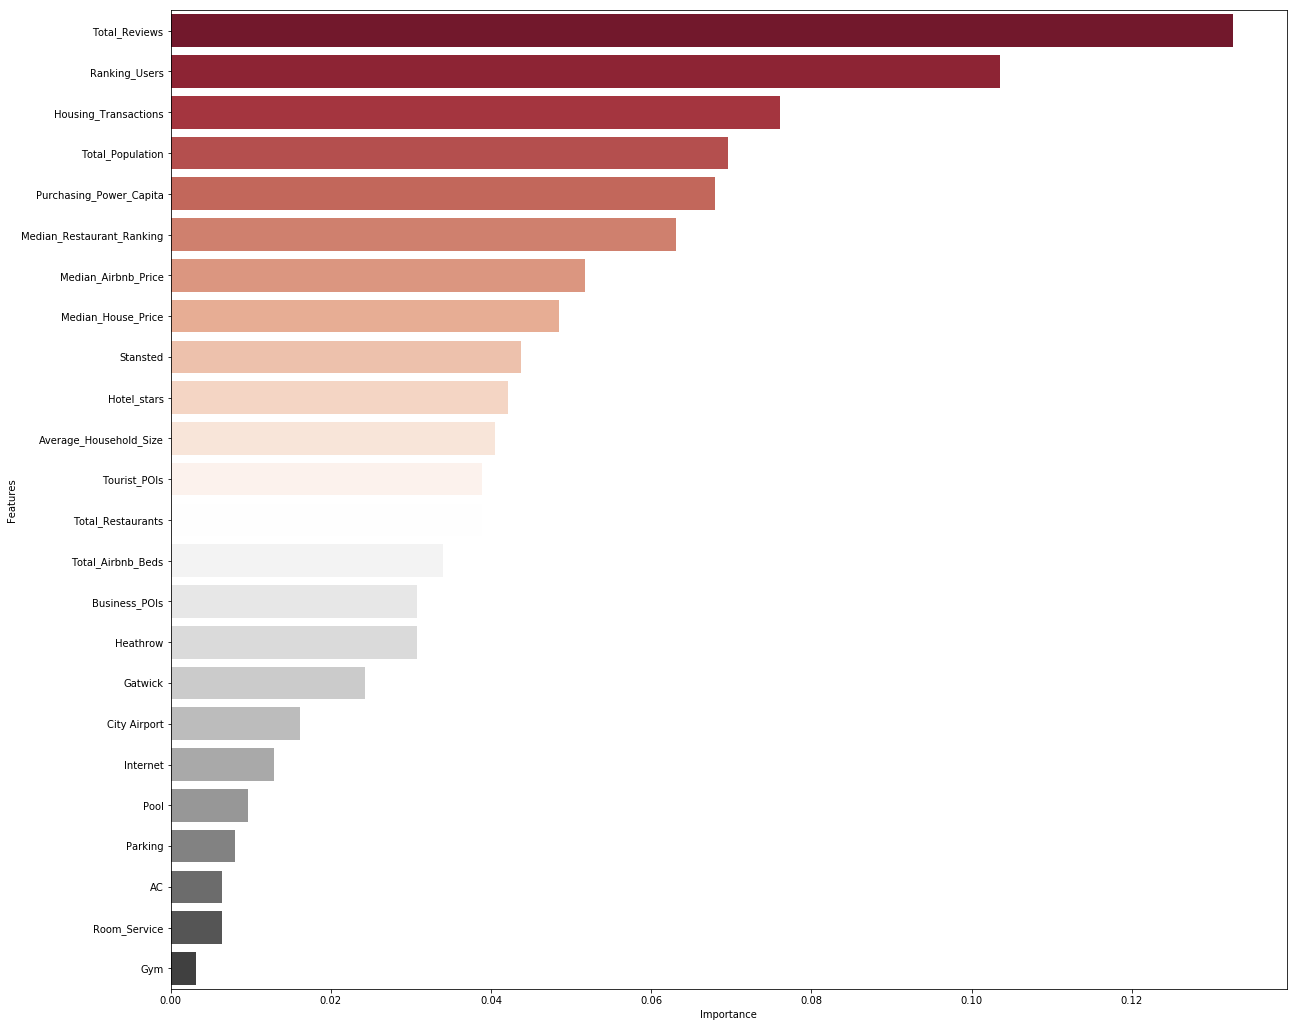

In [108]:
plt.figure(figsize=(20,18))
#sns.palplot(sns.color_palette("RdGy", 10))
sns.barplot(x='importance', y='feature', data=feature_importance, palette= sns.color_palette("RdGy", 25))
plt.xlabel("Importance")
plt.ylabel("Features")

**Actual vs Predicted values plot** 

Text(0,0.5,'Actual')

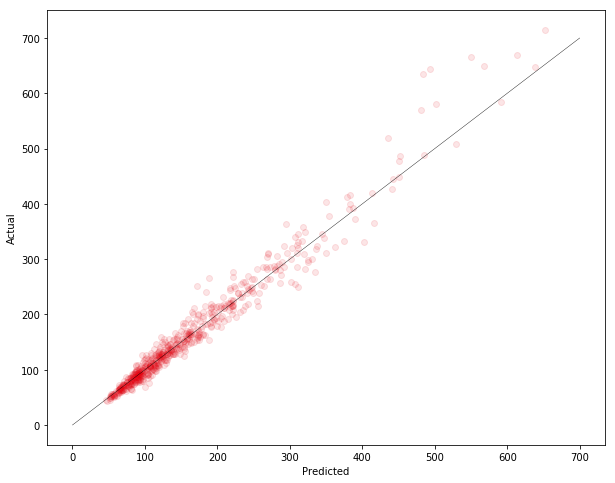

In [55]:
plt.figure(figsize=(10,8))
plt.scatter(xgboost_train_pred, inv_boxcox(hotels_y_train,-0.27145002), alpha=.1, color='#E30613')
plt.plot(np.linspace(0,700,1000), np.linspace(0,700,1000), color='k', linewidth=0.4)
plt.xlabel("Predicted")
plt.ylabel("Actual")

**Residual plot**

Text(0,0.5,'Residual')

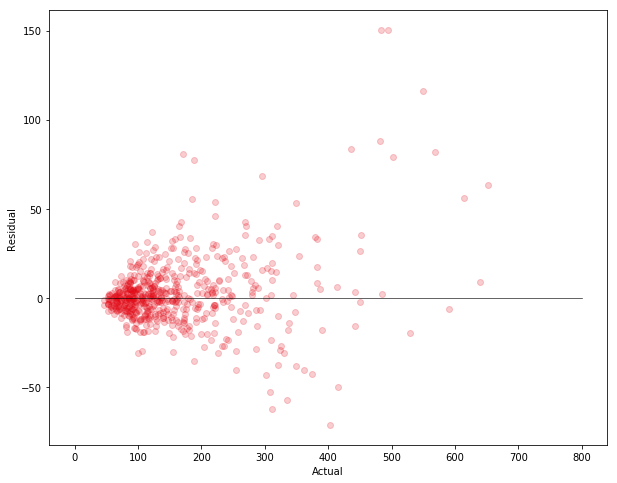

In [76]:
plt.figure(figsize=(10,8))
plt.scatter(inv_boxcox(xgboost_model.predict(hotels_train),-0.27145002), inv_boxcox(hotels_y_train,-0.27145002) - inv_boxcox(xgboost_model.predict(hotels_train),-0.27145002), alpha=.2, color='#E30613')
plt.plot(np.linspace(0,800,1000), np.linspace(0,0,1000),color='k', linewidth=0.6)
plt.xlabel("Actual")
plt.ylabel("Residual")